In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display as display
import librosa.feature as feature
import librosa.effects as effects

In [2]:
y, sampling_rate = librosa.load('songs/669 Part. 2.mp3', duration = 15.0)

print('Loaded song! Duration: %ds' % (len(y) / sampling_rate))

/home/baragouin/.venv/pool2023/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Loaded song! Duration: 15s


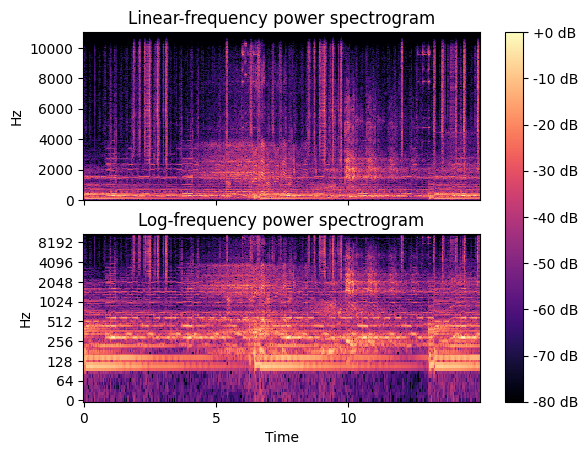

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = display.specshow(D, y_axis='linear', x_axis='time', sr=sampling_rate, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
display.specshow(D, y_axis='log', sr=sampling_rate, hop_length=hop_length, x_axis='time', ax=ax[1])

ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()

fig.colorbar(img, ax=ax, format="%+2.f dB")

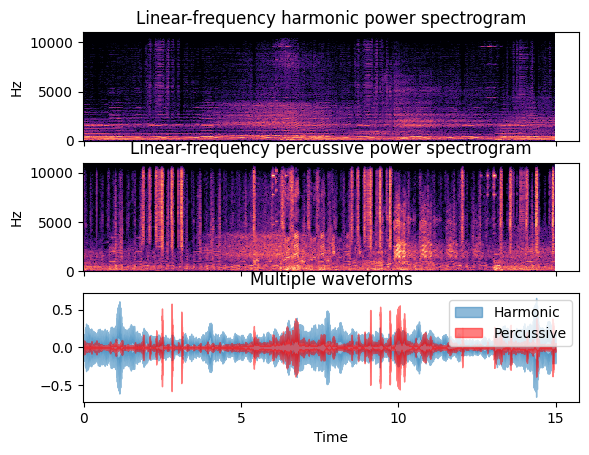

In [5]:
fig, ax = plt.subplots(nrows=3, sharex=True)

y_harm, y_perc = effects.hpss(y)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y_harm)), ref=np.max)
img = display.specshow(D, y_axis='linear', x_axis='time', sr=sampling_rate, ax=ax[0])
ax[0].set(title='Linear-frequency harmonic power spectrogram')
ax[0].label_outer()

D = librosa.amplitude_to_db(np.abs(librosa.stft(y_perc)), ref=np.max)
img = display.specshow(D, y_axis='linear', x_axis='time', sr=sampling_rate, ax=ax[1])
ax[1].set(title='Linear-frequency percussive power spectrogram')
ax[1].label_outer()

librosa.display.waveshow(y_harm, sr=sampling_rate, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sampling_rate, color='r', alpha=0.5, ax=ax[2], label='Percussive')

ax[2].set(title='Multiple waveforms')
ax[2].legend()